In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, ScalarFormatter, FuncFormatter
import seaborn as sns
import numpy as np
from ema_workbench import RealParameter, CategoricalParameter, ScalarOutcome, ema_logging, load_results
from ema_workbench.analysis import lines, prim
from ema_workbench.analysis.plotting_util import Density

In [6]:
wd = r'./results'

**Load results**

In [10]:
results2 = load_results(r"./results_final_flightrestriction.tar.gz")
experiments2, outcomes2 = results2[0].copy(), results2[1].copy()

result_refscenario = load_results(r"./results_refscenario.tar.gz")
experiment, outcome_refscenario = result_refscenario[0].copy(), result_refscenario[1].copy()

result_baseline = load_results(r"./results_baseline1.tar.gz")
baseline, outcome_baseline = result_baseline[0].copy(), result_baseline[1].copy()

**Create plots**

Define results and labels

In [29]:
RESULTS2 = ["Total accumulated emissions"]
ylabels = {
    "Total accumulated emissions": "Total accumulated \nemissions [MtCO2]"
}

Set style

In [14]:
plt.rcParams['figure.figsize'] = (12, 3.75 * len(RESULTS2))  #adjust figure height per outcome
plt.style.use('ggplot')  #use ggplot style 
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.rm'] = 'Arial'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


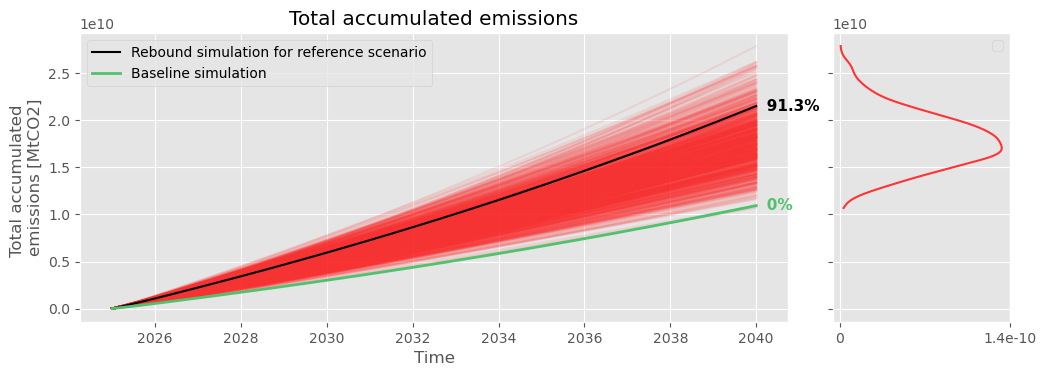

In [31]:
red2 = '#FF3333'
green2 = '#4FC26E'

fig, axes = lines(
    experiments2,
    outcomes2,
    RESULTS2,
    group_by=None,  
    density=Density.KDE,  
    ylabels=ylabels,
    legend=False 
)

for outcome, ax in axes.items():
    if outcome == 'Total accumulated emissions':
        #plot the reference scenario for "Total accumulated emissions"
        ax.plot(outcome_refscenario['TIME'].flatten(),  #time values
                outcome_refscenario['Total accumulated emissions'].flatten(),  #emission values
                color='black', linestyle='-', label='Rebound simulation for reference scenario')
        
        #plot the baseline scenario 
        ax.plot(outcome_baseline['TIME'].flatten(),  #time values
                outcome_baseline['Total accumulated emissions'].flatten()/2,  #emission values
                color=green2, linestyle='-', linewidth=2, label='Baseline simulation')
        
        #add rebound-induced offset label for reference scenario (91.3%)
        ax.text(outcome_refscenario['TIME'].flatten()[-1],  #last time value for red line
                outcome_refscenario['Total accumulated emissions'].flatten()[-1],  #last emission value for red line
                '  91.3%', color='black', fontsize=11, fontweight='bold', verticalalignment='center', horizontalalignment='left', zorder=15)
        
        #add rebound-induced offset label for baseline scenario (0%)
        ax.text(outcome_baseline['TIME'].flatten()[-1],  # Last time value for red line
                outcome_baseline['Total accumulated emissions'].flatten()[-1]/2,  # Last emission value for red line
                '  0%', color=green2, fontsize=11, fontweight='bold', verticalalignment='center', horizontalalignment='left') 

for outcome, ax in axes.items():
    all_lines = ax.lines
    density_line = all_lines[-1]
    for line in all_lines: 
        if line is not density_line and 'Baseline' not in line.get_label() and 'reference' not in line.get_label() and 'efficiency' not in line.get_label():
            line.set_color(red2)  #set color to red2
            line.set_alpha(0.1)  #set transparency to 0.1
            line.set_linewidth(1.5) #set linewidth to 1.5
        elif line is density_line and 'Baseline' not in line.get_label():
            line.set_color(red2) #no transparency for density line to ensure visibility
            
for outcome, ax in axes.items():
    ax.legend(loc='best')
            
plt.savefig("acc_emissions_flightrestriction.png", dpi=300, bbox_inches='tight')
plt.show()


In [32]:
RESULTS3 = ["Average demand fulfillment rate"]
ylabels = {
    "Average demand fulfillment rate": "Average demand fulfillemnt\nrate [Dmnl]"
}

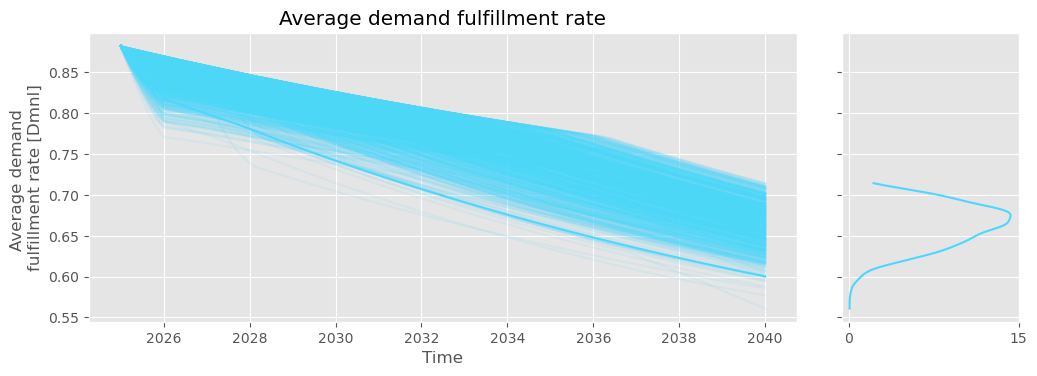

In [37]:
blue2 = '#4DD7FF'

fig, axes = lines(
    experiments2,
    outcomes2,
    RESULTS3,
    group_by=None,  
    density=Density.KDE,  
    ylabels=ylabels,
    legend=False 
)

for outcome, ax in axes.items():
    all_lines = ax.lines
    density_line = all_lines[-1]
    for line in all_lines: 
        if line is not density_line and 'Baseline' not in line.get_label() and 'reference' not in line.get_label() and 'efficiency' not in line.get_label():
            line.set_color(blue2)  #set color to blue2
            line.set_alpha(0.1)  #set transparency to 0.1
            line.set_linewidth(1.5) #set linewidth to 1.5
        elif line is density_line:
            line.set_color(blue2) #no transparency for density line to ensure visibility

plt.savefig("demandfulfillmentrate_flightrestriction.png", dpi=300, bbox_inches='tight')
plt.show()